Objective: Predict weekly pizza sales and calculate the required ingredients to optimize inventory management.
Deliverables:
Predictive model for sales forecasting.
A purchase order system that computes ingredient requirements.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales=pd.read_excel(r"C:\Users\Shiva\OneDrive\Desktop\cardekho\Pizza_Sale.xlsx")
ingredients=pd.read_excel(r"C:\Users\Shiva\OneDrive\Desktop\cardekho\Pizza_ingredients.xlsx")

In [3]:
sales

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01 00:00:00,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01 00:00:00,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01 00:00:00,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01 00:00:00,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


Data Cleaning

In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48604 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48613 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48597 non-null  object 
 10  pizza_ingredients  48607 non-null  object 
 11  pizza_name         48613 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [5]:
sales.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id        16
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           7
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64

In [6]:
sales['total_price'] = sales['total_price'].fillna(
    sales['quantity'] * sales['unit_price']
)

In [7]:
# Check the relationship between 'pizza_name' and 'pizza_name_id'
mapping = sales[['pizza_name', 'pizza_name_id']].dropna().drop_duplicates()
print(mapping)


                     pizza_name  pizza_name_id
0            The Hawaiian Pizza     hawaiian_m
1      The Classic Deluxe Pizza  classic_dlx_m
2         The Five Cheese Pizza  five_cheese_l
3     The Italian Supreme Pizza    ital_supr_l
4            The Mexicana Pizza     mexicana_m
...                         ...            ...
591             The Greek Pizza    the_greek_l
617       The Soppressata Pizza  soppressata_m
621       The Soppressata Pizza  soppressata_s
768         The Calabrese Pizza    calabrese_l
3447            The Greek Pizza  the_greek_xxl

[91 rows x 2 columns]


In [8]:
# Create a dictionary for imputation
name_to_id = dict(zip(mapping['pizza_name'], mapping['pizza_name_id']))

# Impute missing 'pizza_name_id' based on 'pizza_name'
sales['pizza_name_id'] = sales['pizza_name_id'].fillna(
    sales['pizza_name'].map(name_to_id)
)


In [9]:
sales.isnull().sum()

pizza_id              0
order_id              0
pizza_name_id         0
quantity              0
order_date            0
order_time            0
unit_price            0
total_price           0
pizza_size            0
pizza_category       23
pizza_ingredients    13
pizza_name            7
dtype: int64

In [10]:
category_mapping = sales[['pizza_name', 'pizza_category']].dropna().drop_duplicates()
category_dict = dict(zip(category_mapping['pizza_name'], category_mapping['pizza_category']))

# Impute 'pizza_category' based on 'pizza_name'
sales['pizza_category'] = sales['pizza_category'].fillna(
    sales['pizza_name'].map(category_dict)
)

# Fill remaining missing values with mode
sales['pizza_category'] = sales['pizza_category'].fillna(sales['pizza_category'].mode()[0])


In [11]:
ingredients_mapping = sales[['pizza_name', 'pizza_ingredients']].dropna().drop_duplicates()
ingredients_dict = dict(zip(ingredients_mapping['pizza_name'], ingredients_mapping['pizza_ingredients']))

# Impute 'pizza_ingredients' based on 'pizza_name'
sales['pizza_ingredients'] = sales['pizza_ingredients'].fillna(
    sales['pizza_name'].map(ingredients_dict)
)

# Fill remaining missing values with a placeholder
sales['pizza_ingredients'] = sales['pizza_ingredients'].fillna('Not Specified')


In [12]:
name_mapping = sales[['pizza_name_id', 'pizza_name']].dropna().drop_duplicates()
name_dict = dict(zip(name_mapping['pizza_name_id'], name_mapping['pizza_name']))

# Impute 'pizza_name' based on 'pizza_name_id'
sales['pizza_name'] = sales['pizza_name'].fillna(
    sales['pizza_name_id'].map(name_dict)
)

# Fill remaining missing values with a placeholder
sales['pizza_name'] = sales['pizza_name'].fillna('Unnamed Pizza')


In [13]:
sales.duplicated().sum()

np.int64(0)

In [14]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


In [15]:
ingredients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pizza_name_id       518 non-null    object 
 1   pizza_name          518 non-null    object 
 2   pizza_ingredients   518 non-null    object 
 3   Items_Qty_In_Grams  514 non-null    float64
dtypes: float64(1), object(3)
memory usage: 16.3+ KB


In [16]:
ingredients.isnull().sum()

pizza_name_id         0
pizza_name            0
pizza_ingredients     0
Items_Qty_In_Grams    4
dtype: int64

In [17]:
ingredients['Items_Qty_In_Grams']=ingredients['Items_Qty_In_Grams'].fillna(ingredients['Items_Qty_In_Grams'].median())

In [18]:
ingredients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pizza_name_id       518 non-null    object 
 1   pizza_name          518 non-null    object 
 2   pizza_ingredients   518 non-null    object 
 3   Items_Qty_In_Grams  518 non-null    float64
dtypes: float64(1), object(3)
memory usage: 16.3+ KB


In [19]:
ingredients.duplicated().sum()

np.int64(0)

In [20]:
sales['order_date']=pd.to_datetime(sales['order_date'])

In [21]:
sales

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48616,21348,ckn_alfredo_m,1,2015-12-31,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,2015-12-31,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,2015-12-31,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,2015-12-31,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [22]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   pizza_id           48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_name_id      48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [23]:
ingredients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 518 entries, 0 to 517
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   pizza_name_id       518 non-null    object 
 1   pizza_name          518 non-null    object 
 2   pizza_ingredients   518 non-null    object 
 3   Items_Qty_In_Grams  518 non-null    float64
dtypes: float64(1), object(3)
memory usage: 16.3+ KB


Combining the two datasets using pizza_name_id to enrich sales data with ingredient details.


In [24]:
# Merge sales and ingredients data on `pizza_name_id`
merged_data = pd.merge(sales, ingredients, on='pizza_name_id', how='inner')

# Convert `order_date` to datetime format if not already
merged_data['order_date'] = pd.to_datetime(merged_data['order_date'])

# Extract date features
merged_data['day_of_week'] = merged_data['order_date'].dt.dayofweek
merged_data['month'] = merged_data['order_date'].dt.month
merged_data['year'] = merged_data['order_date'].dt.year

# Preview the merged data
print(merged_data.head())


   pizza_id  order_id  pizza_name_id  quantity order_date order_time  \
0         1         1     hawaiian_m         1 2015-01-01   11:38:36   
1         1         1     hawaiian_m         1 2015-01-01   11:38:36   
2         1         1     hawaiian_m         1 2015-01-01   11:38:36   
3         2         2  classic_dlx_m         1 2015-01-01   11:57:40   
4         2         2  classic_dlx_m         1 2015-01-01   11:57:40   

   unit_price  total_price pizza_size pizza_category  \
0       13.25        13.25          M        Classic   
1       13.25        13.25          M        Classic   
2       13.25        13.25          M        Classic   
3       16.00        16.00          M        Classic   
4       16.00        16.00          M        Classic   

                                 pizza_ingredients_x  \
0           Sliced Ham, Pineapple, Mozzarella Cheese   
1           Sliced Ham, Pineapple, Mozzarella Cheese   
2           Sliced Ham, Pineapple, Mozzarella Cheese   
3  Pep

Aggregating Data by Date

In [27]:
daily_sales = merged_data.groupby('order_date')['quantity'].sum().reset_index()
daily_sales.rename(columns={'quantity': 'total_quantity'}, inplace=True)

print(daily_sales.head())


  order_date  total_quantity
0 2015-01-01             917
1 2015-01-02            1053
2 2015-01-03             550
3 2015-01-04             749
4 2015-01-05             861


In [26]:
# Ensure the index is of type datetime and assign a frequency
daily_sales = daily_sales.asfreq('D')  # 'D' stands for daily frequency


Exploratory Data Analysis (EDA)

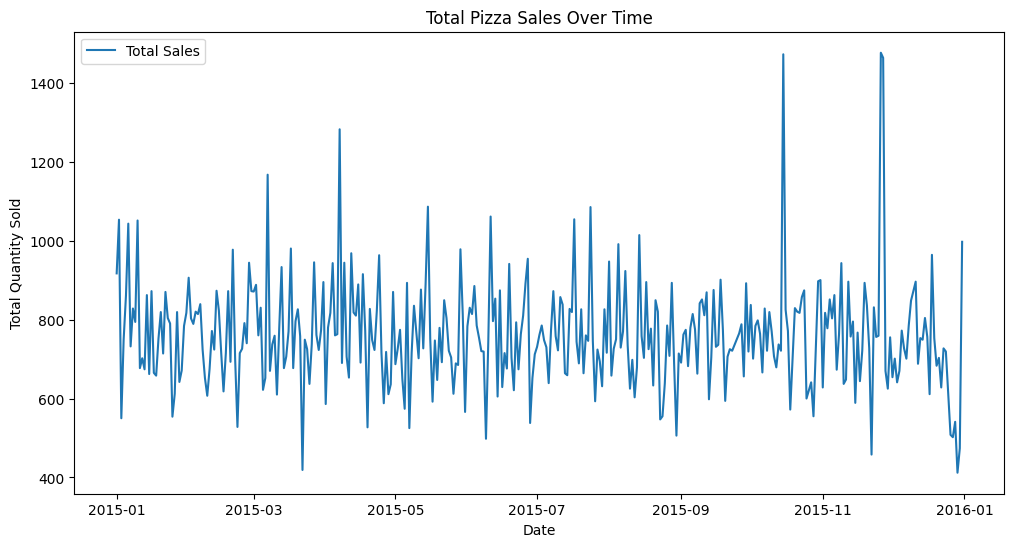

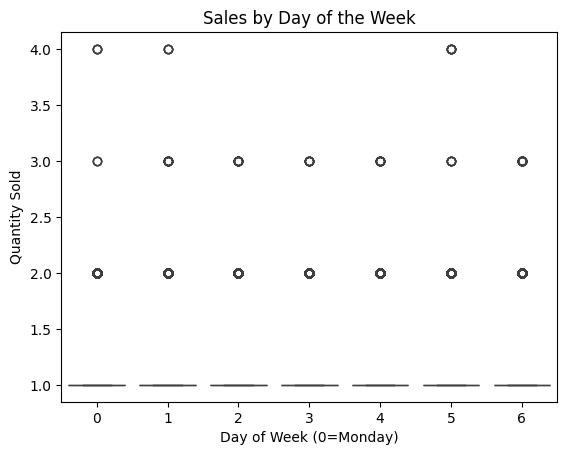

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['order_date'], daily_sales['total_quantity'], label='Total Sales')
plt.title('Total Pizza Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.legend()
plt.show()

# Boxplot for sales by day of the week
sns.boxplot(x=merged_data['day_of_week'], y=merged_data['quantity'])
plt.title('Sales by Day of the Week')
plt.xlabel('Day of Week (0=Monday)')
plt.ylabel('Quantity Sold')
plt.show()


Sales Prediction

In [ ]:
import statsmodels

from statsmodels.tsa.arima.model import ARIMA

# Set the date as the index for ARIMA modeling
daily_sales.set_index('order_date', inplace=True)

# Train ARIMA model (Adjust order=(p, d, q) based on ACF and PACF analysis)
model = ARIMA(daily_sales['total_quantity'], order=(5, 1, 0))
model_fit = model.fit()

# Forecast for the next 7 days
forecast = model_fit.forecast(steps=7)
print("Forecasted Sales for Next 7 Days:", forecast)


Forecasted Sales for Next 7 Days: 358    633.833560
359    560.856944
360    613.709553
361    601.753436
362    605.276767
363    698.023230
364    635.361556
Name: predicted_mean, dtype: float64


c:\Users\Shiva\OneDrive\Desktop\cardekho\car_price_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Shiva\OneDrive\Desktop\cardekho\car_price_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Shiva\OneDrive\Desktop\cardekho\car_price_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Shiva\OneDrive\Desktop\cardekho\car_price_env\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is ava

Regression Model XGBoost

In [30]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_percentage_error

# Lag features for regression
daily_sales['lag_1'] = daily_sales['total_quantity'].shift(1)
daily_sales.dropna(inplace=True)

X = daily_sales[['lag_1']]
y = daily_sales['total_quantity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Forecast next 7 days using the last known lag feature
last_lag = [daily_sales['total_quantity'].iloc[-1]]
forecast = []
for _ in range(7):
    pred = xgb_model.predict([[last_lag[-1]]])
    forecast.append(pred[0])
    last_lag.append(pred[0])

print("Forecasted Sales for Next 7 Days:", forecast)


Forecasted Sales for Next 7 Days: [np.float32(720.41656), np.float32(722.33246), np.float32(855.8042), np.float32(628.5484), np.float32(768.59125), np.float32(682.1652), np.float32(981.58136)]


Purchase Order Generation

In [32]:
# Map forecasted sales to pizza ingredients
forecasted_quantity = sum(forecast)  # Total forecasted sales for next 7 days
ingredient_requirements = {}

# Calculate ingredient requirements
for index, row in ingredients.iterrows():
    ingredients = row['pizza_ingredients'].split(', ')  # Split ingredients
    quantity_per_pizza = row['Items_Qty_In_Grams']
    for ingredient in ingredients:
        ingredient_requirements[ingredient] = ingredient_requirements.get(ingredient, 0) + forecasted_quantity * quantity_per_pizza

# Convert to DataFrame
purchase_order = pd.DataFrame(list(ingredient_requirements.items()), columns=['Ingredient', 'Quantity'])
purchase_order.to_excel('Purchase_Order.xlsx', index=False)
print("Purchase order saved to 'Purchase_Order.xlsx'.")


Purchase order saved to 'Purchase_Order.xlsx'.


order listing the quantities of each ingredient 

In [33]:
purchase_order

,Ingredient,Quantity
0,Barbecued Chicken,4.823495e+05
1,Red Peppers,1.607832e+06
2,Green Peppers,8.843076e+05
3,Tomatoes,6.270546e+06
4,Red Onions,9.325425e+06
...,...,...
59,Onions,3.215664e+05
60,Soppressata Salami,1.607832e+06
61,Peperoncini verdi,1.607832e+05
62,Thai Sweet Chilli Sauce,3.215664e+05
